In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
location = "kc_house_data.csv"
df = pd.read_csv(location)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df_missing = pd.read_csv(location)
df_missing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
dupe=df.duplicated()
df.loc[dupe]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
df2 = df.drop(['id', 'waterfront', 'view', 'floors', 'sqft_lot', 'grade', 'sqft_above', 'condition', 'condition', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement'], axis=1)

In [7]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.054012,0.126434,-0.053203
bedrooms,0.308350,1.000000,0.515884,0.576671,0.154178,0.018841,-0.152668
bathrooms,0.525138,0.515884,1.000000,0.754665,0.506019,0.050739,-0.203866
sqft_living,0.702035,0.576671,0.754665,1.000000,0.318049,0.055363,-0.199430
yr_built,0.054012,0.154178,0.506019,0.318049,1.000000,-0.224874,-0.346869
yr_renovated,0.126434,0.018841,0.050739,0.055363,-0.224874,1.000000,0.064357
zipcode,-0.053203,-0.152668,-0.203866,-0.199430,-0.346869,0.064357,1.000000


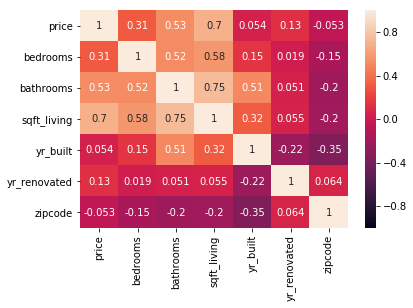

In [8]:
corr = df2.corr()

sns.heatmap(corr, vmin=-1, annot=True)

In [9]:
import statsmodels.formula.api as smf

In [10]:
result = smf.ols('price ~ bedrooms + bathrooms', data=df).fit()

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4154.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        00:24:33   Log-Likelihood:            -3.0409e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21610   BIC:                         6.082e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.064e+04   8270.147     -3.705      0.000   -4.69e+04   -1.44e+04
bedrooms    2.014e+04   2664.002      7.559      0.000    1.49e+04    2.54e+04
bathrooms   2.378e+05   3217.093     73.912      0.000    2.31e+05    2.44e+05
==============================================================================
Omnibus:                    17367.076   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           907583.419
Skew:                           3.478   Prob(JB):                         0.00
Kurtosis:                      33.975   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = smf.ols('price ~ bedrooms + bathrooms - 1', data=df).fit()

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 3.650e+04
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        00:24:34   Log-Likelihood:            -3.0410e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.082e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.361e+04   1998.592      6.809      0.000    9691.964    1.75e+04
bathrooms   2.347e+05   3105.205     75.567      0.000    2.29e+05    2.41e+05
==============================================================================
Omnibus:                    17594.319   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           944393.963
Skew:                           3.542   Prob(JB):                         0.00
Kurtosis:                      34.599   Cond. No.                         7.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""